# 1.Concept of Tensorflow

### Concept of Tensor

In [5]:
import tensorflow as tf

In [6]:
#step01 : build the graph
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(3.0, tf.float32)
node3 = tf.add(node1, node2)
#node3 = node1 + node2 is also available

print("node1:", node1, "node2:", node2)
print("node3:", node3)

('node1:', <tf.Tensor 'Const_2:0' shape=() dtype=float32>, 'node2:', <tf.Tensor 'Const_3:0' shape=() dtype=float32>)
('node3:', <tf.Tensor 'Add_2:0' shape=() dtype=float32>)


### Session

In [ ]:
#step02 : establish the session
sess = tf.Session()

In [ ]:
#step03 : run the session, and return the result
print('sess.run(node1, node2):', sess.run([node1, node2]))
print('sess.run(node3):', sess.run(node3))

### Placeholder

In [7]:
'''Placeholder : let the node to be filled at certain timing'''
#build the graph
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

#feed_dict: put value for placeholder (fill the empty status)
print(sess.run(adder_node, feed_dict={a:3, b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))

7.5
[ 3.  7.]


# 2. Hypothesis Test with Tensorflow

Variable means trainable variable, that tensorflow can change the value
through its learning process

In [17]:
#H(x)=Wx+b
#X, Y data for training set
x_train = [1,2,3]
y_train = [1,2,3]

### Defining variable and Hypothesis for the Test

In [18]:
#random_normal([1]) - 1 dimension value
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#hypothesis definition
hypothesis =x_train*W + b

#cost function definition
#reduce_mean : average function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))


### Minimization of the Cost 

In [20]:
#GradientDescentOptimizer :
#learning_rate : 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
#must initialize the variable with global_variables_initializer()
sess.run(tf.global_variables_initializer())

#Fitting the line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

'''
Without defining x_train, y_train,

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
...
for step in range(2001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train]),
            feed_dict={X:[1,2,3], Y:[1,2,3]})
    
    if step % 20 = 0:
        print(step, cost_val, W_val, b_val)
'''

(0, array([-0.37673366], dtype=float32), array([ 0.20952334], dtype=float32))
(20, array([ 0.61119056], dtype=float32), array([ 0.60580385], dtype=float32))
(40, array([ 0.71737182], dtype=float32), array([ 0.61600447], dtype=float32))
(60, array([ 0.73902488], dtype=float32), array([ 0.59073681], dtype=float32))
(80, array([ 0.75208676], dtype=float32), array([ 0.56332499], dtype=float32))
(100, array([ 0.76381367], dtype=float32), array([ 0.53688413], dtype=float32))
(120, array([ 0.77492082], dtype=float32), array([ 0.51165569], dtype=float32))
(140, array([ 0.78549939], dtype=float32), array([ 0.48760992], dtype=float32))
(160, array([ 0.79558021], dtype=float32), array([ 0.46469408], dtype=float32))
(180, array([ 0.80518723], dtype=float32), array([ 0.44285524], dtype=float32))
(200, array([ 0.81434268], dtype=float32), array([ 0.4220427], dtype=float32))
(220, array([ 0.8230679], dtype=float32), array([ 0.40220824], dtype=float32))
(240, array([ 0.83138305], dtype=float32), array

'\nWithout defining x_train, y_train,\n\nX = tf.placeholder(tf.float32)\nY = tf.placeholder(tf.float32)\n...\nfor step in range(2001):\n    cost_val, W_val, b_val, _ =         sess.run([cost, W, b, train]),\n            feed_dict={X:[1,2,3], Y:[1,2,3]})\n    \n    if step % 20 = 0:\n        print(step, cost_val, W_val, b_val)\n'

# 3. Process of Minimizing the Cost: Gradient-Descent

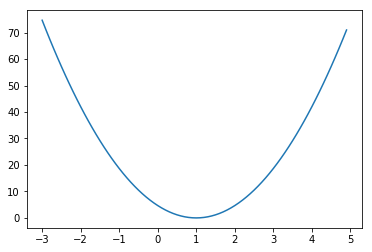

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1,2,3]
Y = [1,2,3]

W = tf.placeholder(tf.float32)
hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis-Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []

for i in range(-30, 50):
    feed_W = i * 0.1
    current_cost, current_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(current_W)
    cost_val.append(current_cost)

plt.plot(W_val, cost_val)
plt.show()